## Introduction:
Test whether transport hubs accelerate the reach of the target

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
links_paths_path = 'wikispeedia_paths-and-graph/'

In [2]:
# Read the articles' names in the articles.tsv
articles_df = pd.read_csv(links_paths_path + 'articles.tsv', sep='\t',\
                                  names = ['article'],  skiprows=12)

# Generate a random article list which has the same size as TOP list as control group
random_data = articles_df.sample(n=200)
random_list = np.array(random_data).tolist()
control_df = pd.DataFrame (random_list, columns = ['article'])
control_df['isTOP'] = 0
control_df

,article,isTOP
0,Edward_VIII_of_the_United_Kingdom,0
1,Hurricane_Lenny,0
2,Jacques_Cartier,0
3,Space_exploration,0
4,Bretton_Woods_system,0
...,...,...
195,James_Bond,0
196,Suez_Canal,0
197,E._P._Wigner,0
198,Common_Hazel,0


In [3]:
TOP100_2011 = pd.read_csv('2011TOP100.csv', usecols=['article'])
TOP100_2011['isTOP'] = 1
TOP100_2011

,article,isTOP
0,United_States,1
1,United_Kingdom,1
2,Europe,1
3,Brain,1
4,Earth,1
...,...,...
95,Norse_mythology,1
96,19th_century,1
97,Jupiter,1
98,Netherlands,1


In [4]:
matched = pd.concat([control_df, TOP100_2011], axis=0, ignore_index=True)

In [5]:
mean_dist = []
length = 4604
with open(links_paths_path + 'shortest-path-distance-matrix.txt') as file:
    for i in range(17):
        next(file)  
    for line in file:
        dist = 0
        line = line.replace("\n", "").replace("_","")
        reach = length - 1
        for num in line:
            dist += int(num)
        if reach < 1:
            mean_ = 10000
        else:
            mean_ = dist/reach
        mean_dist.append(mean_)
temp = pd.DataFrame(mean_dist, columns = ['mean_dist'])

In [6]:
articles_df = pd.concat([articles_df, temp], axis=1)
articles_df

,article,mean_dist
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,2.991962
1,%C3%85land,2.756246
2,%C3%89douard_Manet,2.794699
3,%C3%89ire,2.930697
4,%C3%93engus_I_of_the_Picts,2.984358
...,...,...
4599,Zionism,2.458614
4600,Zirconium,2.621551
4601,Zoroaster,2.781230
4602,Zuid-Gelders,3.413209


In [7]:
matched = matched.join(articles_df.set_index('article'),on='article')

In [8]:
matched

,article,isTOP,mean_dist
0,Edward_VIII_of_the_United_Kingdom,0,2.652618
1,Hurricane_Lenny,0,2.840973
2,Jacques_Cartier,0,2.934608
3,Space_exploration,0,2.697806
4,Bretton_Woods_system,0,2.578753
...,...,...,...
295,Norse_mythology,1,2.684554
296,19th_century,1,2.286987
297,Jupiter,1,2.719965
298,Netherlands,1,2.383446


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     82.09
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           1.76e-17
Time:                        15:07:22   Log-Likelihood:                 35.858
No. Observations:                 300   AIC:                            -67.72
Df Residuals:                     298   BIC:                            -60.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8273      0.015    185.601      0.0

Text(0, 0.5, 'Mean Distance')

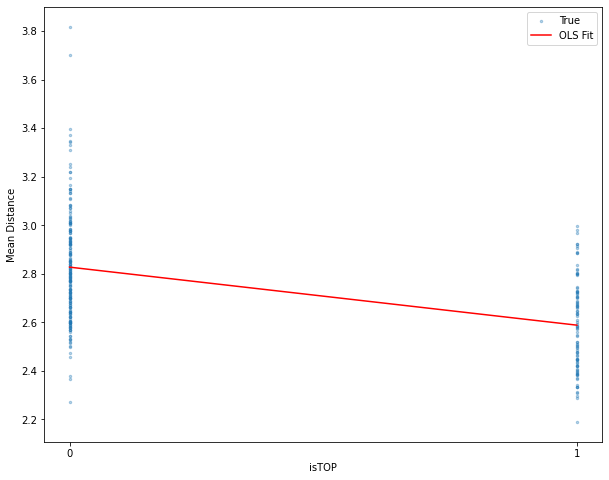

In [9]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import seaborn as sns

# Add a column of value with all 1 to the input matrix for the bias
x0 = np.ones(len(matched))

# Set observed x,y
x = matched['isTOP'].values
y = matched['mean_dist'].values
X = sm.add_constant(x)

# Fit
model = sm.OLS(y, X)
results = model.fit()

# Obtain the predicted y
yFit = results.fittedvalues
print(results.summary())

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.regplot(x = x,y = y,fit_reg = False, label = 'True', scatter_kws = {'alpha' : 1/3, 's' :6})
# ax = sns.regplot(x = x,y = y,fit_reg = False, x_jitter = 0.02, label = 'True', scatter_kws = {'alpha' : 1/3, 's' :5})
ax.plot(x, yFit, 'r-', label="OLS Fit") 
ax.legend(loc='best') 
plt.xticks([0,1])
plt.xlabel('isTOP')
plt.ylabel('Mean Distance')